In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv("dataset/train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test = pd.read_csv("dataset/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
all_data = pd.concat((train, test)).reset_index(drop=True)
all_data = all_data.drop(["SalePrice"],axis=1)
all_data.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.0,0.0,...,WD,0,Pave,8,856.0,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.0,0.0,...,WD,0,Pave,6,1262.0,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.0,0.0,...,WD,0,Pave,6,920.0,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.0,0.0,...,WD,0,Pave,7,756.0,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.0,0.0,...,WD,0,Pave,9,1145.0,AllPub,192,2000,2000,2008


               Missing%
PoolQC        99.657417
MiscFeature   96.402878
Alley         93.216855
Fence         80.438506
FireplaceQu   48.646797
LotFrontage   16.649538
GarageQual     5.447071
GarageCond     5.447071
GarageFinish   5.447071
GarageYrBlt    5.447071


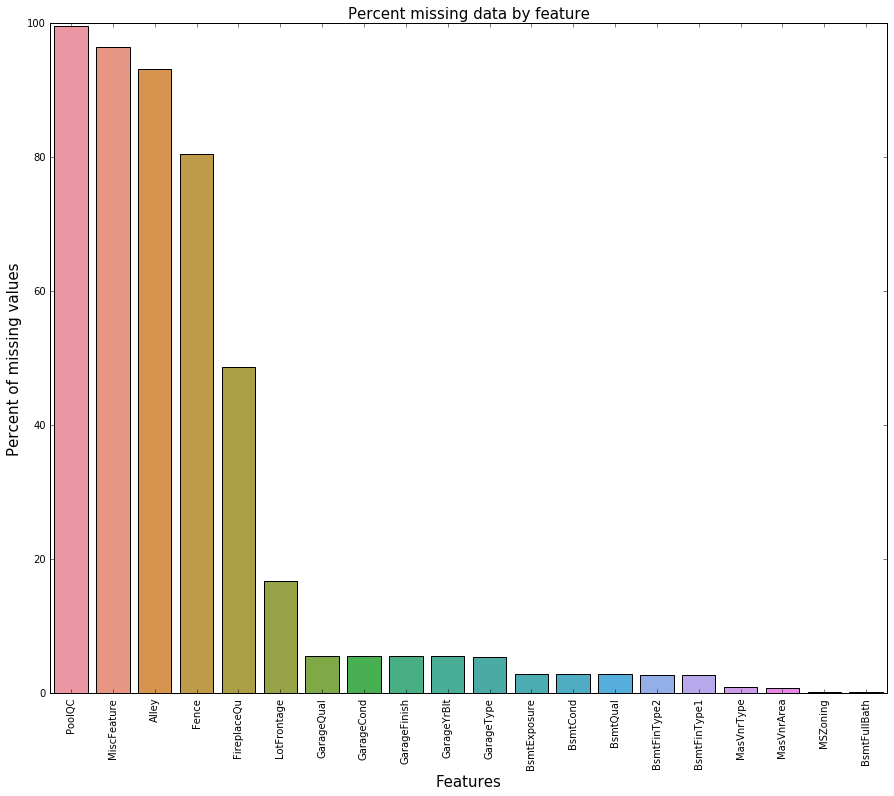

In [5]:
def getMissingValues(train,test,all_data):
    all_data_na = all_data.isnull().sum()/len(all_data)*100
    all_data_na = all_data_na[all_data_na != 0].sort_values(ascending=False)[:20]
    missing = pd.DataFrame({'Missing%':all_data_na})
    print missing.head(10)
    return all_data_na
    
    
#Plot
def plotMissing(missing):
    f, ax = plt.subplots(figsize=(15, 12))
    plt.xticks(rotation='90')
    sns.barplot(x=missing.index, y=missing)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)

missing = getMissingValues(train,test,all_data)
plotMissing(missing)

<b>Dropping features with more than 10% of the data missing<b>

              Missing%
GarageYrBlt   5.447071
GarageQual    5.447071
GarageFinish  5.447071
GarageCond    5.447071
GarageType    5.378554
BsmtCond      2.809181
BsmtExposure  2.809181
BsmtQual      2.774923
BsmtFinType2  2.740665
BsmtFinType1  2.706406


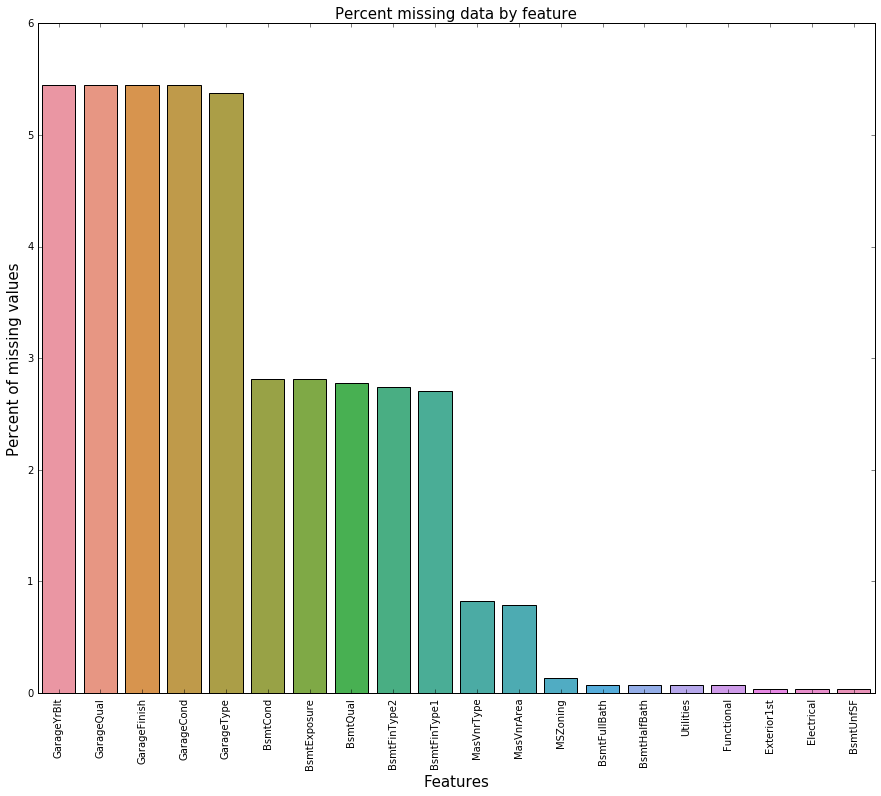

In [6]:
train = train.drop(labels=missing[missing>10.0].index,axis =1)
test = test.drop(labels=missing[missing>10.0].index,axis =1)
all_data = all_data.drop(labels=missing[missing>10.0].index,axis =1)

missing = getMissingValues(train,test,all_data)
plotMissing(missing)

<b>Imputing missing values<b>

In [7]:
train = train.apply(lambda x:x.fillna(x.value_counts().index[0]) if x.dtype == 'O' else x.fillna(x.mean()))
test = test.apply(lambda x:x.fillna(x.value_counts().index[0]) if x.dtype == 'O' else x.fillna(x.mean()))
all_data = all_data.apply(lambda x:x.fillna(x.value_counts().index[0]) if x.dtype == 'O' else x.fillna(x.mean()))
missing = getMissingValues(train,test,all_data)

Empty DataFrame
Columns: [Missing%]
Index: []


<b>Getting the most relevant columns using correlation<b>

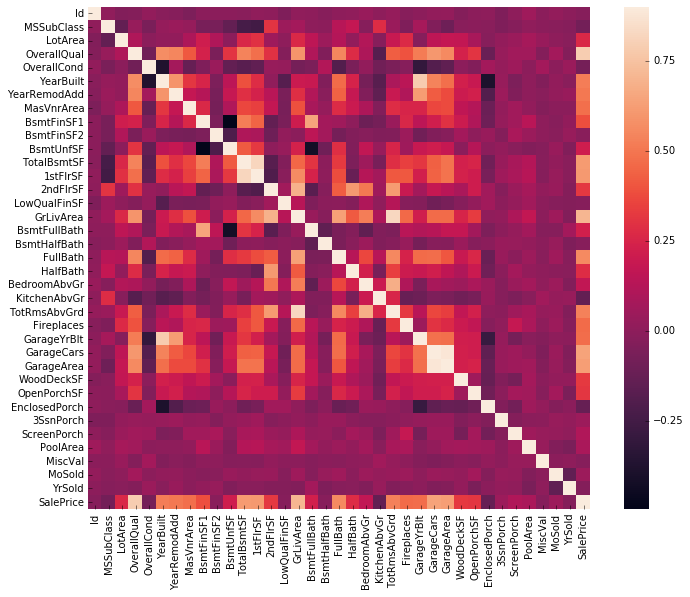

In [8]:
def plotCorr(data):
    corrmat = data.corr()
    plt.subplots(figsize=(12,9))
    sns.heatmap(corrmat, vmax=0.9, square=True)
plotCorr(train)

In [9]:
all_data = pd.get_dummies(all_data)
sp = train.loc[:,"SalePrice"]
train,test = all_data.loc[0:1459],all_data.loc[1460:]
train.loc[:,"SalePrice"] = sp
print train.shape,test.shape

(1460, 271) (1459, 270)


/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.preprocessing import RobustScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
def init_classifiers():
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

    lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

    ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

    GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                       max_depth=4, max_features='sqrt',
                                       min_samples_leaf=15, min_samples_split=10, 
                                       loss='huber', random_state =5)

    model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                                 learning_rate=0.05, max_depth=3, 
                                 min_child_weight=1.7817, n_estimators=2200,
                                 reg_alpha=0.4640, reg_lambda=0.8571,
                                 subsample=0.5213, silent=1,
                                 random_state =7, nthread = -1)
    NB = GaussianNB()
    model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                                  learning_rate=0.05, n_estimators=720,
                                  max_bin = 55, bagging_fraction = 0.8,
                                  bagging_freq = 5, feature_fraction = 0.2319,
                                  feature_fraction_seed=9, bagging_seed=9,
                                  min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)
    randForr = RandomForestRegressor()
    lr = linear_model.LinearRegression()

    return {"Kernel Ridge" : KRR,"Elastic Net" : ENet,"Lasso" : lasso,"Linear Reggression":lr}

In [11]:
def rmsle_cv(model,train,n_folds):
    rand_train = train.sample(frac=1)
    x_train,y_train = rand_train.drop(["SalePrice"],axis=1),rand_train.loc[:,"SalePrice"]
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(x_train)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

def cross_validate(train):
    acc = {}
    classifiers = init_classifiers()
    for clf_name,clf in classifiers.items():
        score = rmsle_cv(clf,train,5)
        print("\n{}: {} ".format(clf_name,score.mean()))
        acc[clf_name] = score.mean()
    return acc

In [12]:
prev_acc = cross_validate(train)


Linear Reggression: 28633299.7369 


/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)



Lasso: 88988.6430493 


/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.76406649116e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.37953998669e-20
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 5.4909499194e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be


Kernel Ridge: 11077020.4385 

Elastic Net: 90003.0225154 


<b>Testing accuracy after taking columns with high correlation<b>

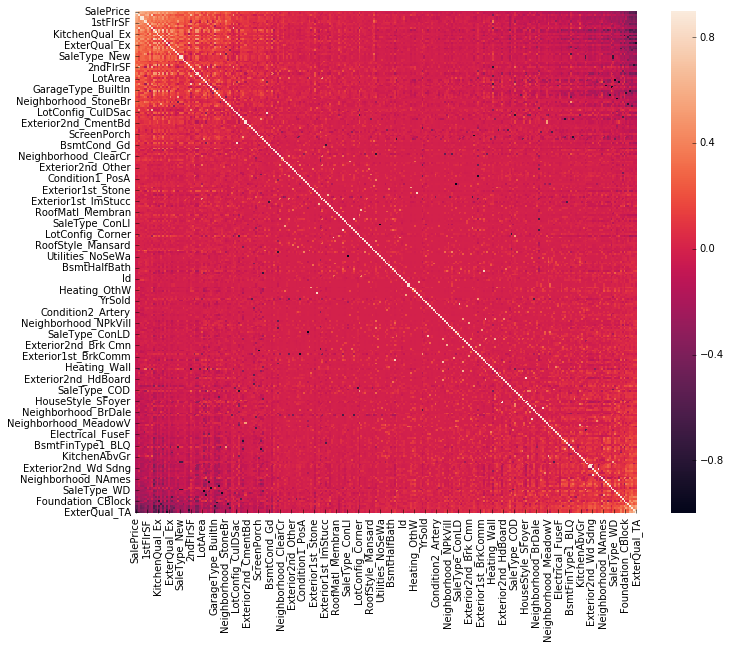

In [13]:
ix = train.corr().sort_values('SalePrice', ascending=False).index
train_sorted = train.loc[:, ix]
ix = ix.drop(["SalePrice"])
test_sorted = test.loc[:,ix]

plotCorr(train_sorted)


Linear Reggression: 79831.6487448 

Lasso: 79481.6934091 


/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.74995156461e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.40110185521e-21
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 6.34332524209e-22
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to b


Kernel Ridge: 24168339.3508 

Elastic Net: 79746.8709356 


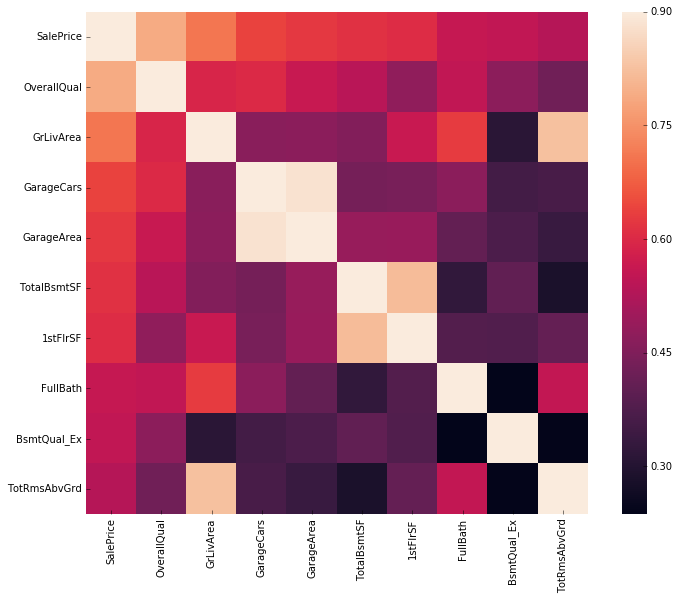

In [14]:
train_sorted = train_sorted.iloc[:,:10]
plotCorr(train_sorted)
acc_corr = cross_validate(train_sorted)

<b>Testing accuracy after normalizing<b>

   SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0   0.541506          0.5   0.380070         0.0    0.281573    -0.269652   
1   0.220173          0.0  -0.312090         0.0   -0.082816     0.538308   
2   0.720024          0.5   0.497489         0.0    0.530021    -0.142289   
3  -0.273728          0.5   0.390885         1.0    0.670807    -0.468657   
4   1.035406          1.0   1.134029         1.0    1.474120     0.305473   

   1stFlrSF  FullBath  BsmtQual_Ex  TotRmsAbvGrd  
0 -0.453608       0.0          0.0           1.0  
1  0.343643       0.0          0.0           0.0  
2 -0.327933       0.0          0.0           0.0  
3 -0.247423      -1.0          0.0           0.5  
4  0.113893       0.0          0.0           1.5  

Linear Reggression: 0.946493993107 

Lasso: 0.945322261735 

Kernel Ridge: 0.961160406744 

Elastic Net: 0.949337406542 


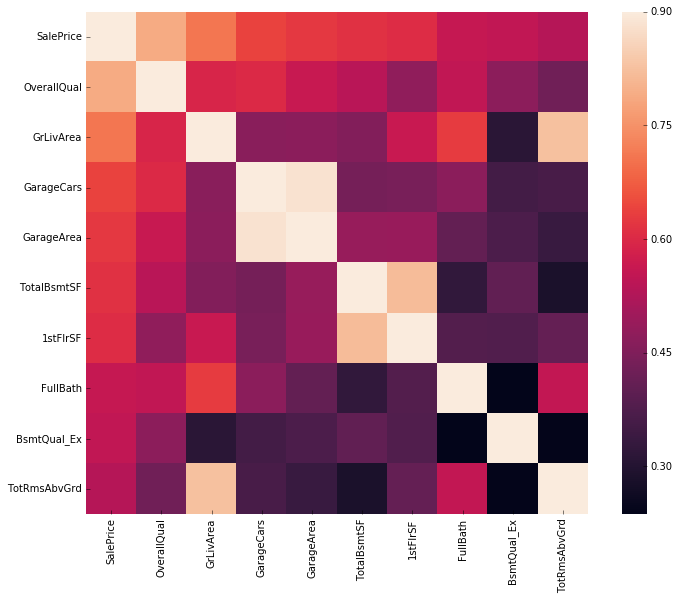

In [15]:
robust_scaler = RobustScaler()        #Robust scaler is used because dataset is likely to have outliers
train_norm = train_sorted.copy()
robust_scaler.fit(train_norm)
train_norm.loc[:,:] = robust_scaler.transform(train_norm)
print train_norm.head()

plotCorr(train_norm)
acc_norm = cross_validate(train_norm)

<b>Testing accuracy using PCA for data reduction<b>

In [16]:
pca = PCA(n_components=10)
pca.fit(all_data)
train_pca = train.copy()

train_pca_x = train_pca.drop(columns=["SalePrice"])
train_pca_x = pd.DataFrame(pca.transform(train_pca_x))
train_pca_x.loc[:,"SalePrice"] = train_norm["SalePrice"]
train_pca_x.head()

,0,1,2,3,4,5,6,7,8,9,SalePrice
0,-1711.282478,-1475.487362,-72.266732,-180.479789,242.564559,-733.741766,-165.145772,-8.394699,85.764022,37.202809,0.541506
1,-556.135425,-1451.933897,51.330702,682.836807,-310.326519,-223.156610,-88.044239,27.513057,-54.563751,-115.511767,0.220173
2,1088.736302,-1464.441704,-56.704860,-397.878304,248.773033,-422.863481,-156.250251,-18.548516,114.695756,-9.315941,0.720024
3,-616.664901,-1462.933133,-198.093914,-483.630720,270.748295,-187.149767,23.865213,39.155304,121.913965,-162.587028,-0.273728
4,4116.387182,-1473.018532,445.467644,-566.826254,243.269658,-578.060479,-146.480901,-40.910622,278.319065,45.038636,1.035406



Linear Reggression: 0.948112003736 

Lasso: 0.945248994827 


/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.81457451429e-22
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 2.64421389239e-22
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 9.52205501166e-23
  ' condition number: {}'.format(rcond), RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to b


Kernel Ridge: 417.310548927 

Elastic Net: 0.948482764877 


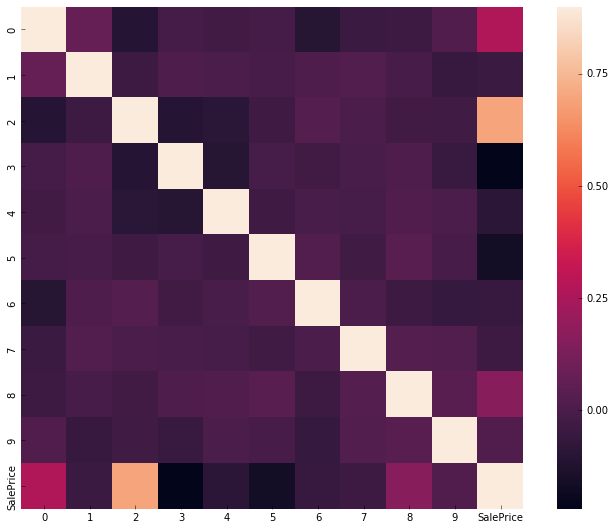

In [17]:
plotCorr(train_pca_x)
acc_pca = cross_validate(train_pca_x)

In [18]:
acc = [prev_acc,acc_corr,acc_norm,acc_pca]
acc_df = pd.DataFrame(columns=["Classifier","Accuracy","Stage"])
stage = {0:"Initial",1:"High corr",2:"Normalized",3:"PCA"}
for i in range(len(acc)):
    for c in acc[i]:
        acc_df = acc_df.append(pd.Series([c,acc[i][c],stage[i]],index=["Classifier","Accuracy","Stage"]),ignore_index=True)

            Classifier      Accuracy       Stage
0          Elastic Net  9.000302e+04     Initial
1   Linear Reggression  2.863330e+07     Initial
2         Kernel Ridge  1.107702e+07     Initial
3                Lasso  8.898864e+04     Initial
4          Elastic Net  7.974687e+04   High corr
5   Linear Reggression  7.983165e+04   High corr
6         Kernel Ridge  2.416834e+07   High corr
7                Lasso  7.948169e+04   High corr
8          Elastic Net  9.493374e-01  Normalized
9   Linear Reggression  9.464940e-01  Normalized
10        Kernel Ridge  9.611604e-01  Normalized
11               Lasso  9.453223e-01  Normalized
12         Elastic Net  9.484828e-01         PCA
13  Linear Reggression  9.481120e-01         PCA
14        Kernel Ridge  4.173105e+02         PCA
15               Lasso  9.452490e-01         PCA


/usr/lib/python2.7/dist-packages/matplotlib/scale.py:101: RuntimeWarning: invalid value encountered in less_equal
  a[a <= 0.0] = 1e-300


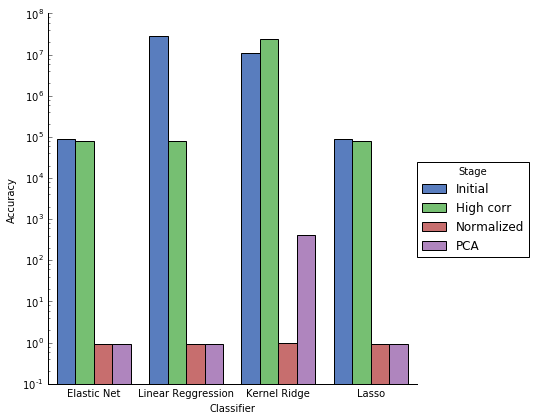

In [19]:
def plotCrossValidationAccuracy(acc):
    print acc.head(50)
    g = sns.factorplot(data=acc,x="Classifier",y="Accuracy",hue="Stage",
                       kind="bar",size=6, palette="muted", legend=True)
    g.fig.get_axes()[0].set_yscale('log')

plotCrossValidationAccuracy(acc_df)